In [1]:
!pip install pandas numpy scikit-learn matplotlib seaborn


In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.metrics import mean_squared_error, r2_score


In [3]:
df = pd.read_csv("IMDb Movies India.csv", encoding='latin1')
df.head()


,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
0,,NaN,NaN,Drama,NaN,NaN,J.S. Randhawa,Manmauji,Birbal,Rajendra Bhatia
1,#Gadhvi (He thought he was Gandhi),(2019),109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
2,#Homecoming,(2021),90 min,"Drama, Musical",NaN,NaN,Soumyajit Majumdar,Sayani Gupta,Plabita Borthakur,Roy Angana
3,#Yaaram,(2019),110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
4,...And Once Again,(2010),105 min,Drama,NaN,NaN,Amol Palekar,Rajat Kapoor,Rituparna Sengupta,Antara Mali


In [4]:
# See column names, data types, and non-null values
df.info()

# Summary stats of numerical columns (like IMDb Rating)
df.describe()

# Check for missing values in each column
df.isnull().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15509 entries, 0 to 15508
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      15509 non-null  object 
 1   Year      14981 non-null  object 
 2   Duration  7240 non-null   object 
 3   Genre     13632 non-null  object 
 4   Rating    7919 non-null   float64
 5   Votes     7920 non-null   object 
 6   Director  14984 non-null  object 
 7   Actor 1   13892 non-null  object 
 8   Actor 2   13125 non-null  object 
 9   Actor 3   12365 non-null  object 
dtypes: float64(1), object(9)
memory usage: 1.2+ MB


Name           0
Year         528
Duration    8269
Genre       1877
Rating      7590
Votes       7589
Director     525
Actor 1     1617
Actor 2     2384
Actor 3     3144
dtype: int64

In [5]:
# Show actual column names
df.columns


Index(['Name', 'Year', 'Duration', 'Genre', 'Rating', 'Votes', 'Director',
       'Actor 1', 'Actor 2', 'Actor 3'],
      dtype='object')

In [6]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()  # Create a LabelEncoder object


In [7]:
df.loc[:, 'Genre'] = le.fit_transform(df['Genre'])
df.loc[:, 'Director'] = le.fit_transform(df['Director'])
df.loc[:, 'Actor 1'] = le.fit_transform(df['Actor 1'])


In [8]:
# Select the necessary columns
df = df[['Name', 'Genre', 'Director', 'Actor 1', 'Rating']]

# Remove rows with missing values
df.dropna(inplace=True)

# Show first few rows
df.head()


,Name,Genre,Director,Actor 1,Rating
1,#Gadhvi (He thought he was Gandhi),299,1548,3280,7.0
3,#Yaaram,228,3319,2917,4.4
5,...Aur Pyaar Ho Gaya,197,3800,895,4.7
6,...Yahaan,366,4993,1698,7.4
8,?: A Question Mark,418,305,4654,5.6


In [9]:
from sklearn.preprocessing import LabelEncoder

# Create a label encoder
le = LabelEncoder()

# Encode categorical columns
df['Genre'] = le.fit_transform(df['Genre'])
df['Director'] = le.fit_transform(df['Director'])
df['Actor 1'] = le.fit_transform(df['Actor 1'])


In [10]:
from sklearn.model_selection import train_test_split

# Features: Genre, Director, Actor 1
X = df[['Genre', 'Director', 'Actor 1']]

# Target: Rating
y = df['Rating']

# Split into 80% train, 20% test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Check shape
print("Training data shape:", X_train.shape)
print("Testing data shape:", X_test.shape)


Training data shape: (6335, 3)
Testing data shape: (1584, 3)


In [11]:
from sklearn.linear_model import LinearRegression

# Create and train model
model = LinearRegression()
model.fit(X_train, y_train)


,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [12]:
# Predict on test data
y_pred = model.predict(X_test)

# Show few predictions
print("Predicted Ratings:", y_pred[:5])
print("Actual Ratings:", y_test.values[:5])


Predicted Ratings: [6.02791589 5.63009058 5.67055906 5.93241947 6.06173009]
Actual Ratings: [3.3 5.3 5.7 7.2 3.5]


In [13]:
from sklearn.metrics import mean_squared_error, r2_score

# Evaluate model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R² Score:", r2)


Mean Squared Error: 1.8108347998393748
R² Score: 0.025985244372295213


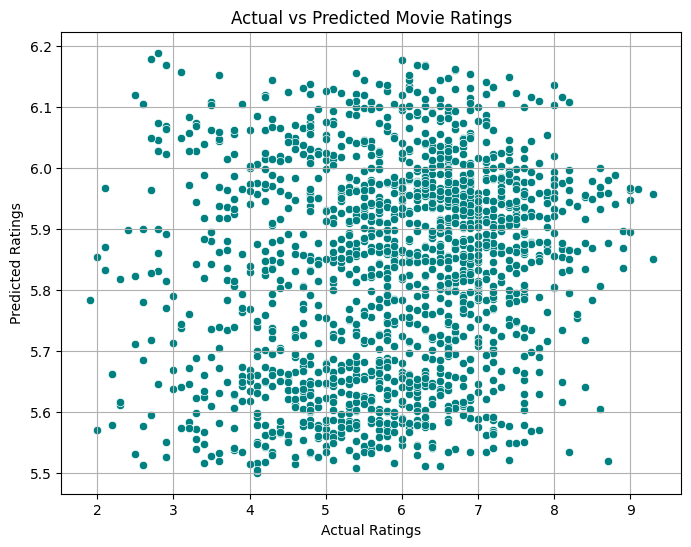

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred, color='teal')
plt.xlabel("Actual Ratings")
plt.ylabel("Predicted Ratings")
plt.title("Actual vs Predicted Movie Ratings")
plt.grid(True)
plt.show()


In [15]:
from sklearn.ensemble import RandomForestRegressor

# Train Random Forest model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Predict
rf_pred = rf_model.predict(X_test)

# Evaluate
rf_mse = mean_squared_error(y_test, rf_pred)
rf_r2 = r2_score(y_test, rf_pred)

print("Random Forest MSE:", rf_mse)
print("Random Forest R² Score:", rf_r2)


Random Forest MSE: 1.6872841610870999
Random Forest R² Score: 0.09244086209215485


In [16]:
print("Linear Regression R²:", r2)
print("Random Forest R²:", rf_r2)


Linear Regression R²: 0.025985244372295213
Random Forest R²: 0.09244086209215485


In [18]:
# Sort the DataFrame by Rating in descending order and take top 10
top_movies = df.sort_values(by='Rating', ascending=False).head(10)


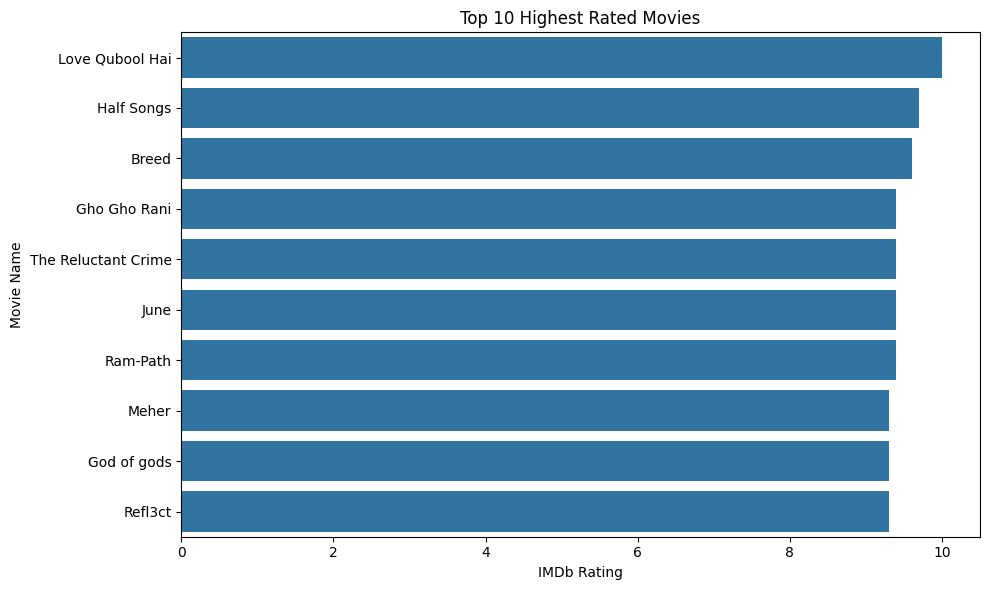

In [19]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Rating', y='Name', data=top_movies)
plt.title("Top 10 Highest Rated Movies")
plt.xlabel("IMDb Rating")
plt.ylabel("Movie Name")
plt.tight_layout()
plt.show()
